<a href="https://colab.research.google.com/github/startlingadama/optimiseurs/blob/main/Optimisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install memory_profiler==0.61.0
!pip install codecarbon==2.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from memory_profiler import profile # memory used
from codecarbon import EmissionsTracker # carbon emission

import random
import sklearn.metrics as metrics

In [7]:
### Chargement

data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# splitting des data
((train_data,train_label), (test_data,test_label)) = data

In [6]:
train_data.shape

(60000, 28, 28)

### Analyse Exploratoire des données

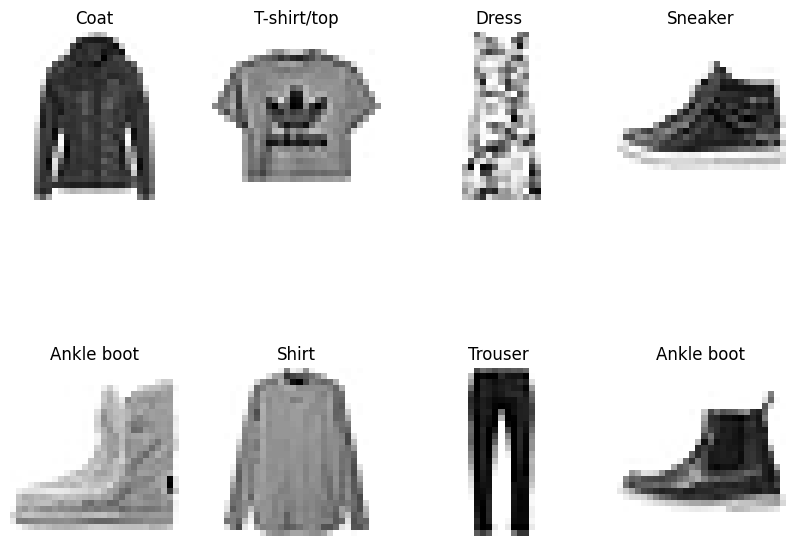

In [7]:
# Presentation de quelques elements de la data avec le label aléatoirement
column_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

liste_samples = range(len(train_data))
plt.figure(figsize=(10,8))

for i in range(8):
    plt.subplot(2,4,i+1)
    index = random.choice(liste_samples)
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(column_names[train_label[index]])
    plt.axis('off')


### Contruction du model

In [9]:
model = None

def build_model(name):
  tf.random.set_seed(42)

  model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(28, 28), name='input'),
        tf.keras.layers.Flatten( name = "applati"),
        tf.keras.layers.Dense(10, activation='relu', name = "Couche_cachee_1"),
        tf.keras.layers.Dense(10, activation='relu', name = "Couche_cachee_2"),
        tf.keras.layers.Dense(10, activation='relu', name = "Couche_cachee_3"),
        tf.keras.layers.Dense(10, activation='softmax', name = "sortie")
    ], name = name)
  return model


In [10]:
# fonction optimiseurs

def set_optimiser(optimizer=None):
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy()],
        optimizer=optimizer,
    )

On utilisera le profile pour voir la consommation en memoire
time pour le temps d'execution
EmissionTracer de codecarbon pour la consomation en energy

In [11]:
# fonction fit
@profile
def fit():
    tracker = EmissionsTracker()
    tracker.start()

    history = model.fit(train_data, train_label, epochs=50,
                       validation_data=(test_data, test_label))

    emissions = tracker.stop()
    print(f"Estimated carbon emissions: {emissions} kg CO2e")

    return history

In [11]:
train_label.shape

(60000,)

In [12]:
num_class = 10
train_label = tf.one_hot(train_label, num_class)
test_label = tf.one_hot(test_label, num_class)
train_data, test_data = train_data / 255.0, test_data / 255.0

### Batch Gradient

In [13]:
%%time

gda = tf.keras.optimizers.SGD(learning_rate=0.01,
    momentum=0.0,# Coefficient de moment
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD')
model = build_model("gda_model")
set_optimiser(gda)
history_gda = fit()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 847, in enable
    sys.settrace(self.trace_memory_usage)

[codecarbon INFO @ 21:10:44] [setup] RAM Tracking...
[codecarbon INFO @ 21:10:44] [setup] GPU Tracking...
[codecarbon INFO @ 21:10:44] No GPU found.
[codecarbon INFO @ 21:10:44] [setup] CPU Tracking...
[codecarbon WARNING @ 21:10:44] No CPU tracking mode found. Falling back on CPU constant mode.


ERROR: Could not find file <ipython-input-10-4d7bfd7f56d1>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


[codecarbon WARNING @ 21:11:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 21:11:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 21:11:09] >>> Tracker's metadata:
[codecarbon INFO @ 21:11:09]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 21:11:09]   Python version: 3.10.12
[codecarbon INFO @ 21:11:09]   CodeCarbon version: 2.2.3
[codecarbon INFO @ 21:11:09]   Available RAM : 12.675 GB
[codecarbon INFO @ 21:11:09]   CPU count: 2
[codecarbon INFO @ 21:11:09]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 21:11:09]   GPU count: None
[codecarbon INFO @ 21:11:09]   GPU model: None


Epoch 1/50
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.3830 - loss: 1.6961

[codecarbon INFO @ 21:11:24] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:11:24] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:24] 0.000197 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.3837 - loss: 1.6941 - val_categorical_accuracy: 0.7178 - val_loss: 0.7391
Epoch 2/50
1061/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.7578 - loss: 0.6895

[codecarbon INFO @ 21:11:39] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:11:39] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:39] 0.000394 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.7632 - loss: 0.6725 - val_categorical_accuracy: 0.7526 - val_loss: 0.6535
Epoch 3/50
1573/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.7963 - loss: 0.5840

[codecarbon INFO @ 21:11:54] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:11:54] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:11:54] 0.000591 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.7972 - loss: 0.5815 - val_categorical_accuracy: 0.7693 - val_loss: 0.6215
Epoch 4/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8114 - loss: 0.5401

[codecarbon INFO @ 21:12:09] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:12:09] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:09] 0.000787 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8114 - loss: 0.5401 - val_categorical_accuracy: 0.7826 - val_loss: 0.5960
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8214 - loss: 0.5129 - val_categorical_accuracy: 0.7924 - val_loss: 0.5749
Epoch 6/50
 517/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.8277 - loss: 0.5018

[codecarbon INFO @ 21:12:24] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:12:24] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:24] 0.000984 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8294 - loss: 0.4920 - val_categorical_accuracy: 0.8019 - val_loss: 0.5554
Epoch 7/50


[codecarbon INFO @ 21:12:39] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:12:39] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:39] 0.001181 kWh of electricity used since the beginning.


1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8342 - loss: 0.4736

[codecarbon INFO @ 21:12:54] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:12:54] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:12:54] 0.001378 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8342 - loss: 0.4736 - val_categorical_accuracy: 0.8081 - val_loss: 0.5417
Epoch 8/50
1336/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8392 - loss: 0.4609

[codecarbon INFO @ 21:13:09] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:13:09] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:09] 0.001575 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8399 - loss: 0.4586 - val_categorical_accuracy: 0.8117 - val_loss: 0.5338
Epoch 9/50
1699/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8440 - loss: 0.4467

[codecarbon INFO @ 21:13:24] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:13:24] Energy consumed for all CPUs : 0.001593 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:24] 0.001772 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - categorical_accuracy: 0.8441 - loss: 0.4463 - val_categorical_accuracy: 0.8169 - val_loss: 0.5255
Epoch 10/50
 765/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8463 - loss: 0.4406

[codecarbon INFO @ 21:13:39] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:13:39] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:39] 0.001969 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - categorical_accuracy: 0.8474 - loss: 0.4358 - val_categorical_accuracy: 0.8183 - val_loss: 0.5203
Epoch 11/50


[codecarbon INFO @ 21:13:54] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:13:54] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:13:54] 0.002165 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8500 - loss: 0.4273 - val_categorical_accuracy: 0.8220 - val_loss: 0.5134
Epoch 12/50
 275/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - categorical_accuracy: 0.8532 - loss: 0.4284

[codecarbon INFO @ 21:14:09] Energy consumed for RAM : 0.000238 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:14:09] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:09] 0.002362 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8536 - loss: 0.4203 - val_categorical_accuracy: 0.8256 - val_loss: 0.5094
Epoch 13/50
 831/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - categorical_accuracy: 0.8546 - loss: 0.4182

[codecarbon INFO @ 21:14:24] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:14:24] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:24] 0.002559 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8552 - loss: 0.4144 - val_categorical_accuracy: 0.8270 - val_loss: 0.5061
Epoch 14/50
1305/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8564 - loss: 0.4109

[codecarbon INFO @ 21:14:39] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:14:39] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:39] 0.002756 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8566 - loss: 0.4093 - val_categorical_accuracy: 0.8292 - val_loss: 0.5027
Epoch 15/50
1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8581 - loss: 0.4046

[codecarbon INFO @ 21:14:54] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:14:54] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:14:54] 0.002953 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8581 - loss: 0.4046 - val_categorical_accuracy: 0.8298 - val_loss: 0.4991
Epoch 16/50
1066/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8582 - loss: 0.4031

[codecarbon INFO @ 21:15:09] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:15:09] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:09] 0.003150 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8586 - loss: 0.4008 - val_categorical_accuracy: 0.8311 - val_loss: 0.4958
Epoch 17/50


[codecarbon INFO @ 21:15:24] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:15:24] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:24] 0.003346 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8599 - loss: 0.3973 - val_categorical_accuracy: 0.8322 - val_loss: 0.4925
Epoch 18/50
 472/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8609 - loss: 0.3990

[codecarbon INFO @ 21:15:39] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:15:39] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:39] 0.003543 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8609 - loss: 0.3940 - val_categorical_accuracy: 0.8323 - val_loss: 0.4903
Epoch 19/50


[codecarbon INFO @ 21:15:54] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:15:54] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:15:54] 0.003740 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - categorical_accuracy: 0.8620 - loss: 0.3911 - val_categorical_accuracy: 0.8331 - val_loss: 0.4872
Epoch 20/50


[codecarbon INFO @ 21:16:09] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:16:09] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:09] 0.003937 kWh of electricity used since the beginning.


 958/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8618 - loss: 0.3904

[codecarbon INFO @ 21:16:24] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.7530388832092285 W


 966/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8618 - loss: 0.3904

[codecarbon INFO @ 21:16:24] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:24] 0.004134 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8624 - loss: 0.3881 - val_categorical_accuracy: 0.8334 - val_loss: 0.4856
Epoch 21/50
1408/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8629 - loss: 0.3865

[codecarbon INFO @ 21:16:39] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:16:39] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:39] 0.004330 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8633 - loss: 0.3856 - val_categorical_accuracy: 0.8338 - val_loss: 0.4855
Epoch 22/50
1812/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8644 - loss: 0.3835

[codecarbon INFO @ 21:16:54] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:16:54] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:16:54] 0.004527 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8645 - loss: 0.3834 - val_categorical_accuracy: 0.8344 - val_loss: 0.4834
Epoch 23/50
1081/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8637 - loss: 0.3832

[codecarbon INFO @ 21:17:09] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:17:09] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:09] 0.004724 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8644 - loss: 0.3812 - val_categorical_accuracy: 0.8348 - val_loss: 0.4811
Epoch 24/50
  42/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.8709 - loss: 0.3692

[codecarbon INFO @ 21:17:24] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:17:24] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:24] 0.004921 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8653 - loss: 0.3792 - val_categorical_accuracy: 0.8347 - val_loss: 0.4783
Epoch 25/50


[codecarbon INFO @ 21:17:39] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:17:39] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:39] 0.005117 kWh of electricity used since the beginning.


1639/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8660 - loss: 0.3775

[codecarbon INFO @ 21:17:54] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:17:54] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:17:54] 0.005314 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - categorical_accuracy: 0.8661 - loss: 0.3773 - val_categorical_accuracy: 0.8372 - val_loss: 0.4764
Epoch 26/50
 750/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.8657 - loss: 0.3779

[codecarbon INFO @ 21:18:09] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:18:09] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:18:09] 0.005511 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - categorical_accuracy: 0.8667 - loss: 0.3752 - val_categorical_accuracy: 0.8366 - val_loss: 0.4757
Epoch 27/50
1042/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8666 - loss: 0.3754

[codecarbon INFO @ 21:18:24] Energy consumed for RAM : 0.000574 kWh. RAM Power : 4.7530388832092285 W


1047/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8666 - loss: 0.3754

[codecarbon INFO @ 21:18:24] Energy consumed for all CPUs : 0.005134 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:18:24] 0.005708 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8674 - loss: 0.3736 - val_categorical_accuracy: 0.8372 - val_loss: 0.4741
Epoch 28/50
1386/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8673 - loss: 0.3727

[codecarbon INFO @ 21:18:39] Energy consumed for RAM : 0.000594 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:18:39] Energy consumed for all CPUs : 0.005311 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:18:39] 0.005905 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8677 - loss: 0.3719 - val_categorical_accuracy: 0.8376 - val_loss: 0.4742
Epoch 29/50
 623/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.8670 - loss: 0.3733

[codecarbon INFO @ 21:18:54] Energy consumed for RAM : 0.000614 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:18:54] Energy consumed for all CPUs : 0.005488 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:18:54] 0.006102 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8684 - loss: 0.3703 - val_categorical_accuracy: 0.8387 - val_loss: 0.4723
Epoch 30/50


[codecarbon INFO @ 21:19:09] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:19:09] Energy consumed for all CPUs : 0.005665 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:19:09] 0.006299 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8689 - loss: 0.3687 - val_categorical_accuracy: 0.8381 - val_loss: 0.4715
Epoch 31/50


[codecarbon INFO @ 21:19:24] Energy consumed for RAM : 0.000653 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:19:24] Energy consumed for all CPUs : 0.005842 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:19:24] 0.006496 kWh of electricity used since the beginning.


1382/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8688 - loss: 0.3680

[codecarbon INFO @ 21:19:39] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:19:39] Energy consumed for all CPUs : 0.006020 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:19:39] 0.006692 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8692 - loss: 0.3672 - val_categorical_accuracy: 0.8380 - val_loss: 0.4715
Epoch 32/50
1711/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8700 - loss: 0.3660

[codecarbon INFO @ 21:19:54] Energy consumed for RAM : 0.000693 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:19:54] Energy consumed for all CPUs : 0.006197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:19:54] 0.006889 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8701 - loss: 0.3659 - val_categorical_accuracy: 0.8375 - val_loss: 0.4701
Epoch 33/50
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8706 - loss: 0.3645

[codecarbon INFO @ 21:20:09] Energy consumed for RAM : 0.000712 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:20:09] Energy consumed for all CPUs : 0.006374 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:20:09] 0.007086 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8706 - loss: 0.3645 - val_categorical_accuracy: 0.8384 - val_loss: 0.4696
Epoch 34/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8710 - loss: 0.3632 - val_categorical_accuracy: 0.8395 - val_loss: 0.4676
Epoch 35/50
 222/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.8701 - loss: 0.3643

[codecarbon INFO @ 21:20:24] Energy consumed for RAM : 0.000732 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:20:24] Energy consumed for all CPUs : 0.006551 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:20:24] 0.007283 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8708 - loss: 0.3620 - val_categorical_accuracy: 0.8394 - val_loss: 0.4674
Epoch 36/50
 657/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.8709 - loss: 0.3631

[codecarbon INFO @ 21:20:39] Energy consumed for RAM : 0.000752 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:20:39] Energy consumed for all CPUs : 0.006728 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:20:39] 0.007480 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8717 - loss: 0.3607 - val_categorical_accuracy: 0.8389 - val_loss: 0.4665
Epoch 37/50


[codecarbon INFO @ 21:20:54] Energy consumed for RAM : 0.000772 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:20:54] Energy consumed for all CPUs : 0.006905 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:20:54] 0.007677 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8723 - loss: 0.3596 - val_categorical_accuracy: 0.8385 - val_loss: 0.4663
Epoch 38/50


[codecarbon INFO @ 21:21:09] Energy consumed for RAM : 0.000792 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:21:09] Energy consumed for all CPUs : 0.007082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:21:09] 0.007874 kWh of electricity used since the beginning.


1537/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8724 - loss: 0.3588

[codecarbon INFO @ 21:21:24] Energy consumed for RAM : 0.000811 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:21:24] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:21:24] 0.008071 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8725 - loss: 0.3584 - val_categorical_accuracy: 0.8396 - val_loss: 0.4650
Epoch 39/50
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8730 - loss: 0.3573

[codecarbon INFO @ 21:21:39] Energy consumed for RAM : 0.000831 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:21:39] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:21:39] 0.008268 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8730 - loss: 0.3573 - val_categorical_accuracy: 0.8400 - val_loss: 0.4638
Epoch 40/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8732 - loss: 0.3561 - val_categorical_accuracy: 0.8395 - val_loss: 0.4632
Epoch 41/50
 131/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.8711 - loss: 0.3579

[codecarbon INFO @ 21:21:54] Energy consumed for RAM : 0.000851 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:21:54] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:21:54] 0.008464 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8732 - loss: 0.3551 - val_categorical_accuracy: 0.8396 - val_loss: 0.4627
Epoch 42/50
 632/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.8726 - loss: 0.3565

[codecarbon INFO @ 21:22:09] Energy consumed for RAM : 0.000871 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:22:09] Energy consumed for all CPUs : 0.007790 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:22:09] 0.008661 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8736 - loss: 0.3541 - val_categorical_accuracy: 0.8402 - val_loss: 0.4608
Epoch 43/50
 858/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - categorical_accuracy: 0.8728 - loss: 0.3550

[codecarbon INFO @ 21:22:24] Energy consumed for RAM : 0.000891 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:22:24] Energy consumed for all CPUs : 0.007967 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:22:24] 0.008858 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8737 - loss: 0.3531 - val_categorical_accuracy: 0.8396 - val_loss: 0.4628
Epoch 44/50
1300/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8737 - loss: 0.3531

[codecarbon INFO @ 21:22:39] Energy consumed for RAM : 0.000910 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:22:39] Energy consumed for all CPUs : 0.008144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:22:39] 0.009054 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8741 - loss: 0.3521 - val_categorical_accuracy: 0.8396 - val_loss: 0.4614
Epoch 45/50
1785/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8747 - loss: 0.3512

[codecarbon INFO @ 21:22:54] Energy consumed for RAM : 0.000930 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:22:54] Energy consumed for all CPUs : 0.008321 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:22:54] 0.009251 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8747 - loss: 0.3512 - val_categorical_accuracy: 0.8398 - val_loss: 0.4601
Epoch 46/50
 975/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8736 - loss: 0.3519

[codecarbon INFO @ 21:23:09] Energy consumed for RAM : 0.000950 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:23:09] Energy consumed for all CPUs : 0.008498 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:23:09] 0.009448 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8746 - loss: 0.3504 - val_categorical_accuracy: 0.8397 - val_loss: 0.4608
Epoch 47/50


[codecarbon INFO @ 21:23:24] Energy consumed for RAM : 0.000970 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:23:24] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:23:24] 0.009645 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8751 - loss: 0.3493 - val_categorical_accuracy: 0.8400 - val_loss: 0.4613
Epoch 48/50


[codecarbon INFO @ 21:23:39] Energy consumed for RAM : 0.000990 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:23:39] Energy consumed for all CPUs : 0.008852 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:23:39] 0.009842 kWh of electricity used since the beginning.


1472/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8750 - loss: 0.3490

[codecarbon INFO @ 21:23:54] Energy consumed for RAM : 0.001009 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:23:54] Energy consumed for all CPUs : 0.009029 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:23:54] 0.010039 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8753 - loss: 0.3486 - val_categorical_accuracy: 0.8405 - val_loss: 0.4609
Epoch 49/50
 723/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.8742 - loss: 0.3500

[codecarbon INFO @ 21:24:09] Energy consumed for RAM : 0.001029 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:24:09] Energy consumed for all CPUs : 0.009206 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:24:09] 0.010235 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.8756 - loss: 0.3479 - val_categorical_accuracy: 0.8400 - val_loss: 0.4606
Epoch 50/50
1194/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.8758 - loss: 0.3480

[codecarbon INFO @ 21:24:24] Energy consumed for RAM : 0.001049 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:24:24] Energy consumed for all CPUs : 0.009383 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:24:24] 0.010432 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8762 - loss: 0.3469 - val_categorical_accuracy: 0.8398 - val_loss: 0.4598


[codecarbon INFO @ 21:24:30] Energy consumed for RAM : 0.001057 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:24:30] Energy consumed for all CPUs : 0.009453 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:24:30] 0.010510 kWh of electricity used since the beginning.
/usr/local/lib/python3.10/dist-packages/codecarbon/output.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([dict(data.values)])])

PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug

Estimated carbon emissions: 0.003670409973696496 kg CO2e
CPU times: user 10min 51s, sys: 18.3 s, total: 11min 9s
Wall time: 13min 46s


In [14]:
model.summary()

Model: "gda_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ applati (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Couche_cachee_1 (Dense)              │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Couche_cachee_2 (Dense)              │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Couche_cachee_3 (Dense)              │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sortie (Dense)                       │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,182 (31.96 KB)

 Trainable params: 8,180 (31.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

history

In [15]:
hist_pd = pd.DataFrame(history_gda.history)

<Axes: >

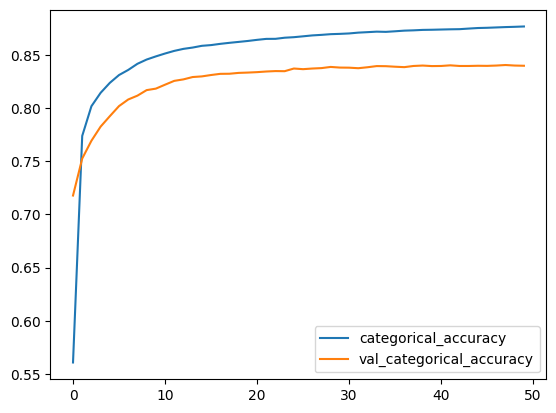

In [16]:
hist_pd[['categorical_accuracy',"val_categorical_accuracy"]].plot()

<Axes: >

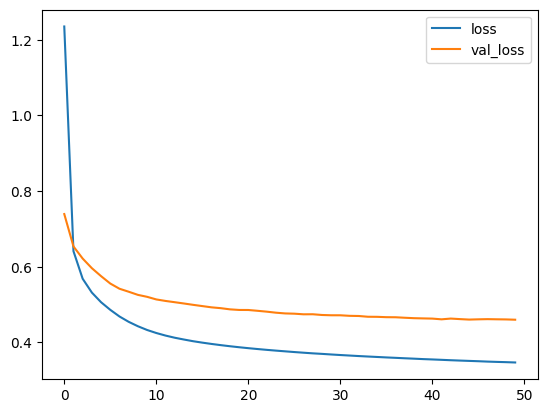

In [17]:
hist_pd[['loss',"val_loss"]].plot()

In [18]:
print(metrics.classification_report(np.argmax(test_label, axis=1), np.argmax(model.predict(test_data), axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.96      0.97      0.96      1000
           2       0.62      0.87      0.72      1000
           3       0.82      0.87      0.84      1000
           4       0.80      0.66      0.72      1000
           5       0.95      0.92      0.93      1000
           6       0.75      0.46      0.57      1000
           7       0.90      0.95      0.92      1000
           8       0.96      0.94      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### Momentum

In [19]:
%%time
momentum = tf.keras.optimizers.SGD(learning_rate=0.01,
    momentum=0.99, # momentum
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD')
model = build_model("momentum_model")
set_optimiser(momentum)
history = fit()

[codecarbon INFO @ 21:24:33] [setup] RAM Tracking...
[codecarbon INFO @ 21:24:33] [setup] GPU Tracking...
[codecarbon INFO @ 21:24:33] No GPU found.
[codecarbon INFO @ 21:24:33] [setup] CPU Tracking...
[codecarbon WARNING @ 21:24:33] No CPU tracking mode found. Falling back on CPU constant mode.


ERROR: Could not find file <ipython-input-10-4d7bfd7f56d1>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


[codecarbon WARNING @ 21:24:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 21:24:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 21:24:43] >>> Tracker's metadata:
[codecarbon INFO @ 21:24:43]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 21:24:43]   Python version: 3.10.12
[codecarbon INFO @ 21:24:43]   CodeCarbon version: 2.2.3
[codecarbon INFO @ 21:24:43]   Available RAM : 12.675 GB
[codecarbon INFO @ 21:24:43]   CPU count: 2
[codecarbon INFO @ 21:24:43]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 21:24:43]   GPU count: None
[codecarbon INFO @ 21:24:43]   GPU model: None


Epoch 1/50
1830/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.3034 - loss: 1.7124

[codecarbon INFO @ 21:24:58] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:24:58] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:24:58] 0.000197 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - categorical_accuracy: 0.3019 - loss: 1.7149 - val_categorical_accuracy: 0.1986 - val_loss: 1.7773
Epoch 2/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.1998 - loss: 1.8262

[codecarbon INFO @ 21:25:13] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:25:13] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:25:13] 0.000394 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.1998 - loss: 1.8263 - val_categorical_accuracy: 0.1731 - val_loss: 1.7797
Epoch 3/50
1013/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.2046 - loss: 1.7517

[codecarbon INFO @ 21:25:28] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:25:28] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:25:28] 0.000591 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2027 - loss: 1.7588 - val_categorical_accuracy: 0.2000 - val_loss: 1.8057
Epoch 4/50
 313/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.1837 - loss: 1.8058

[codecarbon INFO @ 21:25:43] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:25:43] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:25:43] 0.000788 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.1940 - loss: 1.7890 - val_categorical_accuracy: 0.1989 - val_loss: 1.7619
Epoch 5/50
 742/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.2025 - loss: 1.7717

[codecarbon INFO @ 21:25:58] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:25:58] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:25:58] 0.000984 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.2000 - loss: 1.7857 - val_categorical_accuracy: 0.1950 - val_loss: 1.7413
Epoch 6/50


[codecarbon INFO @ 21:26:13] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:26:13] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:26:13] 0.001181 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.1717 - loss: 2.0544 - val_categorical_accuracy: 0.1962 - val_loss: 2.0065
Epoch 7/50


[codecarbon INFO @ 21:26:28] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:26:28] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:26:28] 0.001378 kWh of electricity used since the beginning.


1138/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.2014 - loss: 1.9671

[codecarbon INFO @ 21:26:43] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:26:43] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:26:43] 0.001575 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - categorical_accuracy: 0.1975 - loss: 1.9752 - val_categorical_accuracy: 0.1915 - val_loss: 1.8350
Epoch 8/50
1323/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.1987 - loss: 1.7976

[codecarbon INFO @ 21:26:58] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W


1329/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.1987 - loss: 1.7976

[codecarbon INFO @ 21:26:58] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:26:58] 0.001772 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.1987 - loss: 1.7936 - val_categorical_accuracy: 0.1991 - val_loss: 1.7629
Epoch 9/50
1795/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2027 - loss: 1.7583

[codecarbon INFO @ 21:27:13] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:27:13] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:27:13] 0.001969 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2026 - loss: 1.7583 - val_categorical_accuracy: 0.1972 - val_loss: 1.7473
Epoch 10/50
 875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.2016 - loss: 1.7575

[codecarbon INFO @ 21:27:28] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:27:28] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:27:28] 0.002166 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.1987 - loss: 1.7690 - val_categorical_accuracy: 0.1845 - val_loss: 1.8336
Epoch 11/50
1307/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.1955 - loss: 1.7994

[codecarbon INFO @ 21:27:43] Energy consumed for RAM : 0.000238 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:27:43] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:27:43] 0.002363 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.1957 - loss: 1.8014 - val_categorical_accuracy: 0.2000 - val_loss: 1.7445
Epoch 12/50
 593/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.2005 - loss: 1.7454

[codecarbon INFO @ 21:27:58] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:27:58] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:27:58] 0.002559 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.2004 - loss: 1.7470 - val_categorical_accuracy: 0.1996 - val_loss: 1.7583
Epoch 13/50


[codecarbon INFO @ 21:28:13] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:28:13] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:28:13] 0.002756 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.2003 - loss: 1.7572 - val_categorical_accuracy: 0.1969 - val_loss: 1.7493
Epoch 14/50


[codecarbon INFO @ 21:28:28] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:28:28] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:28:28] 0.002953 kWh of electricity used since the beginning.


1062/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.2016 - loss: 1.7609

[codecarbon INFO @ 21:28:43] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:28:43] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:28:43] 0.003150 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.1999 - loss: 1.7766 - val_categorical_accuracy: 0.1983 - val_loss: 1.8267
Epoch 15/50
1504/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.1948 - loss: 1.8690

[codecarbon INFO @ 21:28:58] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:28:58] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:28:58] 0.003347 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.1951 - loss: 1.8633 - val_categorical_accuracy: 0.1991 - val_loss: 1.7371
Epoch 16/50
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2012 - loss: 1.7410

[codecarbon INFO @ 21:29:13] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:29:13] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:29:13] 0.003543 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2012 - loss: 1.7410 - val_categorical_accuracy: 0.1981 - val_loss: 1.7347
Epoch 17/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2023 - loss: 1.7458 - val_categorical_accuracy: 0.1981 - val_loss: 1.7314
Epoch 18/50
 228/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.2076 - loss: 1.7450

[codecarbon INFO @ 21:29:28] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:29:28] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:29:28] 0.003740 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2022 - loss: 1.7459 - val_categorical_accuracy: 0.1981 - val_loss: 1.7312
Epoch 19/50


[codecarbon INFO @ 21:29:43] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:29:43] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:29:43] 0.003937 kWh of electricity used since the beginning.


1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2035 - loss: 1.7445

[codecarbon INFO @ 21:29:58] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:29:58] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:29:58] 0.004134 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.2035 - loss: 1.7444 - val_categorical_accuracy: 0.1981 - val_loss: 1.7322
Epoch 20/50
 868/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.2045 - loss: 1.7449

[codecarbon INFO @ 21:30:13] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:30:13] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:30:13] 0.004331 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7443 - val_categorical_accuracy: 0.1981 - val_loss: 1.7339
Epoch 21/50
1162/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.2037 - loss: 1.7451

[codecarbon INFO @ 21:30:28] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:30:28] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:30:28] 0.004527 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2022 - loss: 1.7445 - val_categorical_accuracy: 0.1981 - val_loss: 1.7345
Epoch 22/50
1521/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.2028 - loss: 1.7446

[codecarbon INFO @ 21:30:43] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:30:43] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:30:43] 0.004724 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2022 - loss: 1.7441 - val_categorical_accuracy: 0.1981 - val_loss: 1.7325
Epoch 23/50
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2013 - loss: 1.7445

[codecarbon INFO @ 21:30:58] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:30:58] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:30:58] 0.004921 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2013 - loss: 1.7445 - val_categorical_accuracy: 0.1981 - val_loss: 1.7314
Epoch 24/50
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.2009 - loss: 1.7451

[codecarbon INFO @ 21:31:13] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:31:13] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:31:13] 0.005118 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - categorical_accuracy: 0.2009 - loss: 1.7451 - val_categorical_accuracy: 0.1981 - val_loss: 1.7313
Epoch 25/50
1293/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.2025 - loss: 1.7464

[codecarbon INFO @ 21:31:28] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:31:28] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:31:28] 0.005315 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - categorical_accuracy: 0.2016 - loss: 1.7455 - val_categorical_accuracy: 0.1981 - val_loss: 1.7315
Epoch 26/50
 558/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.2037 - loss: 1.7488

[codecarbon INFO @ 21:31:43] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:31:43] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:31:43] 0.005512 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2012 - loss: 1.7458 - val_categorical_accuracy: 0.1981 - val_loss: 1.7317
Epoch 27/50


[codecarbon INFO @ 21:31:58] Energy consumed for RAM : 0.000574 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:31:58] Energy consumed for all CPUs : 0.005134 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:31:58] 0.005708 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.2014 - loss: 1.7460 - val_categorical_accuracy: 0.1981 - val_loss: 1.7317
Epoch 28/50


[codecarbon INFO @ 21:32:13] Energy consumed for RAM : 0.000594 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:32:13] Energy consumed for all CPUs : 0.005311 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:32:13] 0.005905 kWh of electricity used since the beginning.


1044/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.2030 - loss: 1.7478

[codecarbon INFO @ 21:32:28] Energy consumed for RAM : 0.000614 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:32:28] Energy consumed for all CPUs : 0.005489 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:32:28] 0.006102 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7461 - val_categorical_accuracy: 0.1981 - val_loss: 1.7318
Epoch 29/50
1444/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.2021 - loss: 1.7471

[codecarbon INFO @ 21:32:43] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:32:43] Energy consumed for all CPUs : 0.005666 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:32:43] 0.006299 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7462 - val_categorical_accuracy: 0.1981 - val_loss: 1.7318
Epoch 30/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2014 - loss: 1.7463

[codecarbon INFO @ 21:32:58] Energy consumed for RAM : 0.000653 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:32:58] Energy consumed for all CPUs : 0.005842 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:32:58] 0.006495 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2014 - loss: 1.7463 - val_categorical_accuracy: 0.1981 - val_loss: 1.7318
Epoch 31/50
1082/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.2030 - loss: 1.7479

[codecarbon INFO @ 21:33:13] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:33:13] Energy consumed for all CPUs : 0.006019 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:33:13] 0.006692 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2016 - loss: 1.7464 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 32/50
 119/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.2045 - loss: 1.7615

[codecarbon INFO @ 21:33:28] Energy consumed for RAM : 0.000693 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:33:28] Energy consumed for all CPUs : 0.006196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:33:28] 0.006889 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7464 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 33/50
 611/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.2040 - loss: 1.7499

[codecarbon INFO @ 21:33:43] Energy consumed for RAM : 0.000712 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:33:43] Energy consumed for all CPUs : 0.006373 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:33:43] 0.007086 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 34/50
 977/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.2031 - loss: 1.7485

[codecarbon INFO @ 21:33:58] Energy consumed for RAM : 0.000732 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:33:58] Energy consumed for all CPUs : 0.006551 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:33:58] 0.007283 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 35/50
1316/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.2023 - loss: 1.7475

[codecarbon INFO @ 21:34:13] Energy consumed for RAM : 0.000752 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:34:13] Energy consumed for all CPUs : 0.006728 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:34:13] 0.007480 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 36/50
1638/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2017 - loss: 1.7471

[codecarbon INFO @ 21:34:28] Energy consumed for RAM : 0.000772 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:34:28] Energy consumed for all CPUs : 0.006905 kWh. Total CPU Power : 42.5 W


1643/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2017 - loss: 1.7471

[codecarbon INFO @ 21:34:28] 0.007677 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2014 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7319
Epoch 37/50
 651/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.2039 - loss: 1.7499

[codecarbon INFO @ 21:34:43] Energy consumed for RAM : 0.000792 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:34:43] Energy consumed for all CPUs : 0.007082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:34:43] 0.007873 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.2014 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 38/50
1145/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.2027 - loss: 1.7479

[codecarbon INFO @ 21:34:58] Energy consumed for RAM : 0.000811 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:34:58] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:34:58] 0.008070 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.2014 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 39/50
 367/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.2046 - loss: 1.7515

[codecarbon INFO @ 21:35:13] Energy consumed for RAM : 0.000831 kWh. RAM Power : 4.7530388832092285 W


 377/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.2045 - loss: 1.7514

[codecarbon INFO @ 21:35:13] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:35:13] 0.008267 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 40/50
 518/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - categorical_accuracy: 0.2041 - loss: 1.7500

[codecarbon INFO @ 21:35:28] Energy consumed for RAM : 0.000851 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:35:28] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:35:28] 0.008464 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2015 - loss: 1.7465 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 41/50


[codecarbon INFO @ 21:35:43] Energy consumed for RAM : 0.000871 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:35:43] Energy consumed for all CPUs : 0.007790 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:35:43] 0.008660 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 42/50


[codecarbon INFO @ 21:35:58] Energy consumed for RAM : 0.000891 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:35:58] Energy consumed for all CPUs : 0.007967 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:35:58] 0.008857 kWh of electricity used since the beginning.


1097/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.2034 - loss: 1.7481

[codecarbon INFO @ 21:36:13] Energy consumed for RAM : 0.000910 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:36:13] Energy consumed for all CPUs : 0.008144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:36:13] 0.009054 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 43/50
1509/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.2024 - loss: 1.7473

[codecarbon INFO @ 21:36:28] Energy consumed for RAM : 0.000930 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:36:28] Energy consumed for all CPUs : 0.008321 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:36:28] 0.009251 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 44/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.2019 - loss: 1.7466

[codecarbon INFO @ 21:36:43] Energy consumed for RAM : 0.000950 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:36:43] Energy consumed for all CPUs : 0.008498 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:36:43] 0.009448 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 45/50
1202/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.2032 - loss: 1.7478

[codecarbon INFO @ 21:36:58] Energy consumed for RAM : 0.000970 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:36:58] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:36:58] 0.009645 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 46/50
1660/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.2022 - loss: 1.7471

[codecarbon INFO @ 21:37:13] Energy consumed for RAM : 0.000990 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:37:13] Energy consumed for all CPUs : 0.008852 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:37:13] 0.009842 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 47/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2019 - loss: 1.7466

[codecarbon INFO @ 21:37:28] Energy consumed for RAM : 0.001009 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:37:28] Energy consumed for all CPUs : 0.009029 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:37:28] 0.010039 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 48/50
 772/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - categorical_accuracy: 0.2046 - loss: 1.7495

[codecarbon INFO @ 21:37:43] Energy consumed for RAM : 0.001029 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:37:43] Energy consumed for all CPUs : 0.009206 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:37:43] 0.010236 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 49/50
1180/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.2032 - loss: 1.7478

[codecarbon INFO @ 21:37:58] Energy consumed for RAM : 0.001049 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:37:58] Energy consumed for all CPUs : 0.009383 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:37:58] 0.010432 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320
Epoch 50/50
1644/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2022 - loss: 1.7471

[codecarbon INFO @ 21:38:13] Energy consumed for RAM : 0.001069 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:38:13] Energy consumed for all CPUs : 0.009560 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:38:13] 0.010629 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.2019 - loss: 1.7466 - val_categorical_accuracy: 0.1981 - val_loss: 1.7320


[codecarbon INFO @ 21:38:16] Energy consumed for RAM : 0.001072 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 21:38:16] Energy consumed for all CPUs : 0.009590 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 21:38:16] 0.010662 kWh of electricity used since the beginning.


Estimated carbon emissions: 0.003723504476218188 kg CO2e
CPU times: user 10min 56s, sys: 19.8 s, total: 11min 16s
Wall time: 13min 43s


### History

In [20]:
hist_pd = pd.DataFrame(history.history)

<Axes: >

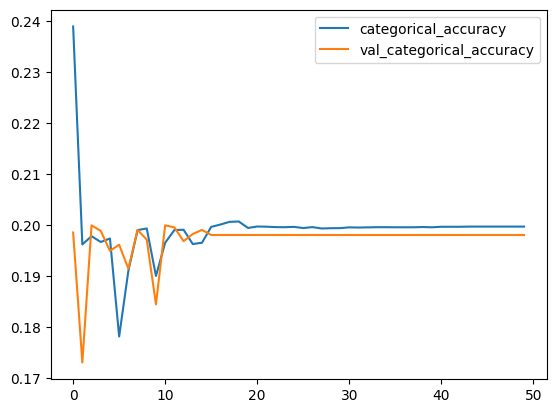

In [21]:
hist_pd[['categorical_accuracy',"val_categorical_accuracy"]].plot()

<Axes: >

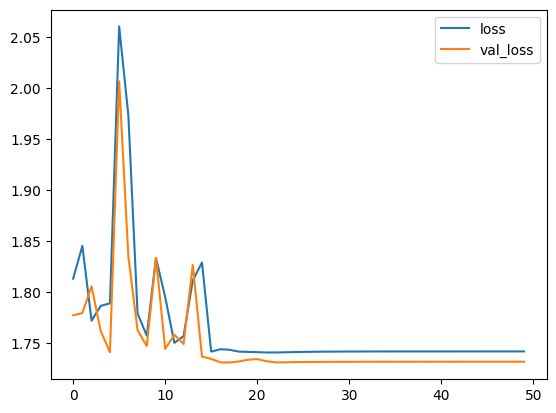

In [22]:
hist_pd[['loss',"val_loss"]].plot()

In [23]:
print(metrics.classification_report(np.argmax(test_label, axis=1), np.argmax(model.predict(test_data), axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.33      0.98      0.49      1000
           6       0.14      1.00      0.25      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.05      0.20      0.07     10000
weighted avg       0.05      0.20      0.07     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### RMSProp

In [20]:
%%time
rmsprop = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='rmsprop'
)
model = build_model("rmsprop_model") # initialise
set_optimiser(rmsprop)
history_rmsprop = fit()

[codecarbon INFO @ 02:01:09] [setup] RAM Tracking...
[codecarbon INFO @ 02:01:09] [setup] GPU Tracking...
[codecarbon INFO @ 02:01:09] No GPU found.
[codecarbon INFO @ 02:01:09] [setup] CPU Tracking...
[codecarbon WARNING @ 02:01:09] No CPU tracking mode found. Falling back on CPU constant mode.


ERROR: Could not find file <ipython-input-11-4d7bfd7f56d1>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


[codecarbon WARNING @ 02:01:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:01:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:01:19] >>> Tracker's metadata:
[codecarbon INFO @ 02:01:19]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 02:01:19]   Python version: 3.10.12
[codecarbon INFO @ 02:01:19]   CodeCarbon version: 2.2.3
[codecarbon INFO @ 02:01:19]   Available RAM : 12.675 GB
[codecarbon INFO @ 02:01:19]   CPU count: 2
[codecarbon INFO @ 02:01:19]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:01:19]   GPU count: None
[codecarbon INFO @ 02:01:19]   GPU model: None


Epoch 1/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.6261 - loss: 1.0462

[codecarbon INFO @ 02:01:34] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:01:34] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:01:34] 0.000197 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - categorical_accuracy: 0.6265 - loss: 1.0451 - val_categorical_accuracy: 0.7782 - val_loss: 0.5958
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8121 - loss: 0.5374 - val_categorical_accuracy: 0.8093 - val_loss: 0.5291
Epoch 3/50
 491/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.8328 - loss: 0.4961

[codecarbon INFO @ 02:01:49] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:01:49] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:01:49] 0.000394 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8350 - loss: 0.4785 - val_categorical_accuracy: 0.8264 - val_loss: 0.4912
Epoch 4/50
1233/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8444 - loss: 0.4544

[codecarbon INFO @ 02:02:04] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:02:04] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:02:04] 0.000591 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8449 - loss: 0.4499 - val_categorical_accuracy: 0.8240 - val_loss: 0.4971
Epoch 5/50
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8506 - loss: 0.4321

[codecarbon INFO @ 02:02:19] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:02:19] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:02:19] 0.000787 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8506 - loss: 0.4321 - val_categorical_accuracy: 0.8261 - val_loss: 0.4854
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8529 - loss: 0.4190 - val_categorical_accuracy: 0.8283 - val_loss: 0.4781
Epoch 7/50


[codecarbon INFO @ 02:02:34] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:02:34] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:02:34] 0.000984 kWh of electricity used since the beginning.


1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8567 - loss: 0.4087

[codecarbon INFO @ 02:02:49] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:02:49] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:02:49] 0.001181 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - categorical_accuracy: 0.8567 - loss: 0.4086 - val_categorical_accuracy: 0.8309 - val_loss: 0.4769
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8578 - loss: 0.4015 - val_categorical_accuracy: 0.8308 - val_loss: 0.4790
Epoch 9/50


[codecarbon INFO @ 02:03:04] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:03:04] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:03:04] 0.001378 kWh of electricity used since the beginning.


1141/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - categorical_accuracy: 0.8589 - loss: 0.3993

[codecarbon INFO @ 02:03:19] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:03:19] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:03:19] 0.001575 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - categorical_accuracy: 0.8601 - loss: 0.3959 - val_categorical_accuracy: 0.8305 - val_loss: 0.4815
Epoch 10/50
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8614 - loss: 0.3914

[codecarbon INFO @ 02:03:34] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:03:34] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:03:34] 0.001772 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8614 - loss: 0.3914 - val_categorical_accuracy: 0.8262 - val_loss: 0.4873
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8629 - loss: 0.3880 - val_categorical_accuracy: 0.8251 - val_loss: 0.4905
Epoch 12/50
 505/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.8601 - loss: 0.3952

[codecarbon INFO @ 02:03:49] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:03:49] Energy consumed for all CPUs : 0.001770 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:03:49] 0.001968 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8641 - loss: 0.3849 - val_categorical_accuracy: 0.8241 - val_loss: 0.4926
Epoch 13/50
1316/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.8646 - loss: 0.3849

[codecarbon INFO @ 02:04:04] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:04:04] Energy consumed for all CPUs : 0.001947 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:04] 0.002165 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8653 - loss: 0.3825 - val_categorical_accuracy: 0.8237 - val_loss: 0.4943
Epoch 14/50
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8657 - loss: 0.3804

[codecarbon INFO @ 02:04:19] Energy consumed for RAM : 0.000238 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:04:19] Energy consumed for all CPUs : 0.002124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:19] 0.002362 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8657 - loss: 0.3804 - val_categorical_accuracy: 0.8257 - val_loss: 0.4891
Epoch 15/50
1229/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8667 - loss: 0.3815

[codecarbon INFO @ 02:04:34] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:04:34] Energy consumed for all CPUs : 0.002301 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:34] 0.002559 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8674 - loss: 0.3786 - val_categorical_accuracy: 0.8248 - val_loss: 0.4922
Epoch 16/50
  20/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - categorical_accuracy: 0.8737 - loss: 0.3634

[codecarbon INFO @ 02:04:49] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:04:49] Energy consumed for all CPUs : 0.002478 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:04:49] 0.002756 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8671 - loss: 0.3775 - val_categorical_accuracy: 0.8269 - val_loss: 0.4861
Epoch 17/50
 698/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.8654 - loss: 0.3825

[codecarbon INFO @ 02:05:04] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:05:04] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:04] 0.002952 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8679 - loss: 0.3758 - val_categorical_accuracy: 0.8333 - val_loss: 0.4783
Epoch 18/50
1361/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8685 - loss: 0.3760

[codecarbon INFO @ 02:05:19] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:05:19] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:19] 0.003149 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8690 - loss: 0.3741 - val_categorical_accuracy: 0.8287 - val_loss: 0.4879
Epoch 19/50
 513/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.8655 - loss: 0.3824

[codecarbon INFO @ 02:05:34] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:05:34] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:34] 0.003346 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8692 - loss: 0.3736 - val_categorical_accuracy: 0.8300 - val_loss: 0.4880
Epoch 20/50


[codecarbon INFO @ 02:05:49] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:05:49] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:05:49] 0.003543 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8681 - loss: 0.3719 - val_categorical_accuracy: 0.8324 - val_loss: 0.4802
Epoch 21/50
 143/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8623 - loss: 0.3845

[codecarbon INFO @ 02:06:04] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:06:04] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:04] 0.003740 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8691 - loss: 0.3718 - val_categorical_accuracy: 0.8330 - val_loss: 0.4845
Epoch 22/50


[codecarbon INFO @ 02:06:19] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:06:19] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:19] 0.003937 kWh of electricity used since the beginning.


1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8698 - loss: 0.3714

[codecarbon INFO @ 02:06:34] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:06:34] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:34] 0.004134 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8698 - loss: 0.3714 - val_categorical_accuracy: 0.8329 - val_loss: 0.4858
Epoch 23/50
 674/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - categorical_accuracy: 0.8665 - loss: 0.3771

[codecarbon INFO @ 02:06:49] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:06:49] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:06:49] 0.004330 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8691 - loss: 0.3704 - val_categorical_accuracy: 0.8329 - val_loss: 0.4910
Epoch 24/50


[codecarbon INFO @ 02:07:04] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:07:04] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:04] 0.004527 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8705 - loss: 0.3706 - val_categorical_accuracy: 0.8350 - val_loss: 0.4830
Epoch 25/50
 636/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8683 - loss: 0.3759

[codecarbon INFO @ 02:07:19] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:07:19] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W


 648/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8684 - loss: 0.3758

[codecarbon INFO @ 02:07:19] 0.004724 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8707 - loss: 0.3691 - val_categorical_accuracy: 0.8340 - val_loss: 0.4897
Epoch 26/50
1351/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8707 - loss: 0.3703

[codecarbon INFO @ 02:07:34] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:07:34] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:34] 0.004921 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - categorical_accuracy: 0.8712 - loss: 0.3685 - val_categorical_accuracy: 0.8319 - val_loss: 0.4978
Epoch 27/50
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8711 - loss: 0.3676

[codecarbon INFO @ 02:07:49] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:07:49] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:07:49] 0.005118 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8711 - loss: 0.3676 - val_categorical_accuracy: 0.8329 - val_loss: 0.4905
Epoch 28/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8710 - loss: 0.3671 - val_categorical_accuracy: 0.8326 - val_loss: 0.4967
Epoch 29/50


[codecarbon INFO @ 02:08:04] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:08:04] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:04] 0.005315 kWh of electricity used since the beginning.


1546/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8716 - loss: 0.3682

[codecarbon INFO @ 02:08:19] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:08:19] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:19] 0.005512 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8719 - loss: 0.3672 - val_categorical_accuracy: 0.8376 - val_loss: 0.4947
Epoch 30/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8715 - loss: 0.3670 - val_categorical_accuracy: 0.8350 - val_loss: 0.5011
Epoch 31/50
  72/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8629 - loss: 0.3830

[codecarbon INFO @ 02:08:34] Energy consumed for RAM : 0.000574 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:08:34] Energy consumed for all CPUs : 0.005134 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:34] 0.005708 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8725 - loss: 0.3672 - val_categorical_accuracy: 0.8366 - val_loss: 0.4975
Epoch 32/50
 858/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.8695 - loss: 0.3730

[codecarbon INFO @ 02:08:49] Energy consumed for RAM : 0.000594 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:08:49] Energy consumed for all CPUs : 0.005311 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:08:49] 0.005905 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8715 - loss: 0.3671 - val_categorical_accuracy: 0.8368 - val_loss: 0.4996
Epoch 33/50
1603/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8707 - loss: 0.3682

[codecarbon INFO @ 02:09:04] Energy consumed for RAM : 0.000614 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:09:04] Energy consumed for all CPUs : 0.005488 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:04] 0.006102 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8712 - loss: 0.3673 - val_categorical_accuracy: 0.8353 - val_loss: 0.5014
Epoch 34/50
 799/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8676 - loss: 0.3741

[codecarbon INFO @ 02:09:19] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:09:19] Energy consumed for all CPUs : 0.005665 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:19] 0.006299 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8706 - loss: 0.3672 - val_categorical_accuracy: 0.8364 - val_loss: 0.5066
Epoch 35/50


[codecarbon INFO @ 02:09:34] Energy consumed for RAM : 0.000653 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:09:34] Energy consumed for all CPUs : 0.005842 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:34] 0.006496 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8710 - loss: 0.3673 - val_categorical_accuracy: 0.8400 - val_loss: 0.4921
Epoch 36/50


[codecarbon INFO @ 02:09:49] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:09:49] Energy consumed for all CPUs : 0.006019 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:09:49] 0.006692 kWh of electricity used since the beginning.


1500/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8699 - loss: 0.3691

[codecarbon INFO @ 02:10:04] Energy consumed for RAM : 0.000693 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:10:04] Energy consumed for all CPUs : 0.006197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:10:04] 0.006889 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8706 - loss: 0.3677 - val_categorical_accuracy: 0.8405 - val_loss: 0.4830
Epoch 37/50
 304/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - categorical_accuracy: 0.8627 - loss: 0.3813

[codecarbon INFO @ 02:10:19] Energy consumed for RAM : 0.000713 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:10:19] Energy consumed for all CPUs : 0.006374 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:10:19] 0.007086 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8708 - loss: 0.3677 - val_categorical_accuracy: 0.8341 - val_loss: 0.4932
Epoch 38/50
1042/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8688 - loss: 0.3723

[codecarbon INFO @ 02:10:34] Energy consumed for RAM : 0.000732 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:10:34] Energy consumed for all CPUs : 0.006551 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:10:34] 0.007283 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8710 - loss: 0.3675 - val_categorical_accuracy: 0.8358 - val_loss: 0.4910
Epoch 39/50
 235/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8629 - loss: 0.3820

[codecarbon INFO @ 02:10:49] Energy consumed for RAM : 0.000752 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:10:49] Energy consumed for all CPUs : 0.006727 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:10:49] 0.007480 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8714 - loss: 0.3676 - val_categorical_accuracy: 0.8325 - val_loss: 0.5037
Epoch 40/50


[codecarbon INFO @ 02:11:04] Energy consumed for RAM : 0.000772 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:11:04] Energy consumed for all CPUs : 0.006904 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:04] 0.007676 kWh of electricity used since the beginning.


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8719 - loss: 0.3680

[codecarbon INFO @ 02:11:19] Energy consumed for RAM : 0.000792 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:11:19] Energy consumed for all CPUs : 0.007082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:19] 0.007873 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8719 - loss: 0.3680 - val_categorical_accuracy: 0.8321 - val_loss: 0.5058
Epoch 41/50
1004/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8697 - loss: 0.3714

[codecarbon INFO @ 02:11:34] Energy consumed for RAM : 0.000812 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:11:34] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:34] 0.008070 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8714 - loss: 0.3669 - val_categorical_accuracy: 0.8336 - val_loss: 0.5045
Epoch 42/50


[codecarbon INFO @ 02:11:49] Energy consumed for RAM : 0.000831 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:11:49] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:11:49] 0.008267 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.8710 - loss: 0.3670 - val_categorical_accuracy: 0.8318 - val_loss: 0.5042
Epoch 43/50


[codecarbon INFO @ 02:12:04] Energy consumed for RAM : 0.000851 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:12:04] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:04] 0.008464 kWh of electricity used since the beginning.


1579/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8706 - loss: 0.3691

[codecarbon INFO @ 02:12:19] Energy consumed for RAM : 0.000871 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:12:19] Energy consumed for all CPUs : 0.007790 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:19] 0.008661 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - categorical_accuracy: 0.8710 - loss: 0.3681 - val_categorical_accuracy: 0.8325 - val_loss: 0.5084
Epoch 44/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8709 - loss: 0.3675 - val_categorical_accuracy: 0.8351 - val_loss: 0.5009
Epoch 45/50


[codecarbon INFO @ 02:12:34] Energy consumed for RAM : 0.000891 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:12:34] Energy consumed for all CPUs : 0.007967 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:34] 0.008857 kWh of electricity used since the beginning.


1519/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8712 - loss: 0.3688

[codecarbon INFO @ 02:12:49] Energy consumed for RAM : 0.000911 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:12:49] Energy consumed for all CPUs : 0.008144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:12:49] 0.009054 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - categorical_accuracy: 0.8717 - loss: 0.3674 - val_categorical_accuracy: 0.8371 - val_loss: 0.4932
Epoch 46/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8714 - loss: 0.3674 - val_categorical_accuracy: 0.8317 - val_loss: 0.5016
Epoch 47/50


[codecarbon INFO @ 02:13:04] Energy consumed for RAM : 0.000930 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:13:04] Energy consumed for all CPUs : 0.008321 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:04] 0.009251 kWh of electricity used since the beginning.


1139/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - categorical_accuracy: 0.8692 - loss: 0.3710

[codecarbon INFO @ 02:13:19] Energy consumed for RAM : 0.000950 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:13:19] Energy consumed for all CPUs : 0.008498 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:19] 0.009448 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8707 - loss: 0.3674 - val_categorical_accuracy: 0.8349 - val_loss: 0.5010
Epoch 48/50
1772/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8702 - loss: 0.3685

[codecarbon INFO @ 02:13:34] Energy consumed for RAM : 0.000970 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:13:34] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:34] 0.009645 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8704 - loss: 0.3682 - val_categorical_accuracy: 0.8408 - val_loss: 0.5003
Epoch 49/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8715 - loss: 0.3675 - val_categorical_accuracy: 0.8405 - val_loss: 0.4952
Epoch 50/50
 313/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8641 - loss: 0.3787

[codecarbon INFO @ 02:13:49] Energy consumed for RAM : 0.000990 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:13:49] Energy consumed for all CPUs : 0.008852 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:49] 0.009842 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8710 - loss: 0.3680 - val_categorical_accuracy: 0.8385 - val_loss: 0.5026


[codecarbon INFO @ 02:13:57] Energy consumed for RAM : 0.001001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:13:57] Energy consumed for all CPUs : 0.008951 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:13:58] 0.009952 kWh of electricity used since the beginning.


Estimated carbon emissions: 0.002174788172034957 kg CO2e
CPU times: user 9min 49s, sys: 18.6 s, total: 10min 7s
Wall time: 12min 49s


History

In [21]:
hist_pd = pd.DataFrame(history_rmsprop.history)

<Axes: >

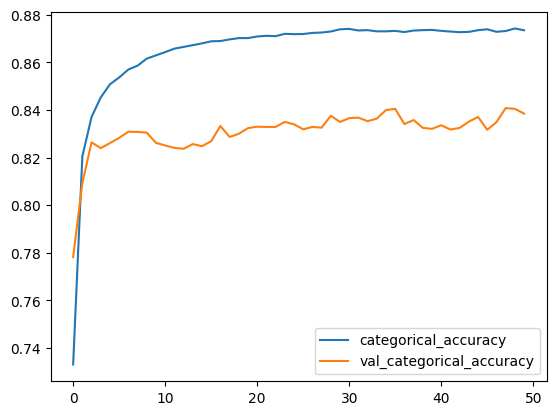

In [22]:
hist_pd[['categorical_accuracy',"val_categorical_accuracy"]].plot()

<Axes: >

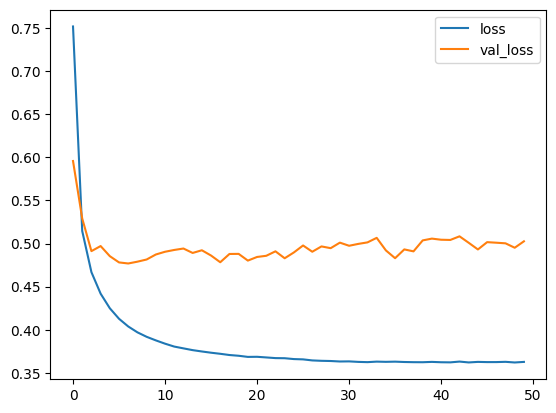

In [23]:
hist_pd[['loss',"val_loss"]].plot()

In [24]:
print(metrics.classification_report(np.argmax(test_label, axis=1), np.argmax(model.predict(test_data), axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.64      0.85      0.73      1000
           3       0.80      0.88      0.84      1000
           4       0.79      0.64      0.71      1000
           5       0.92      0.94      0.93      1000
           6       0.66      0.55      0.60      1000
           7       0.90      0.95      0.92      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Adam

In [25]:
%%time
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='adam'
)
model = build_model("adam_model")
set_optimiser(adam)
history_adam = fit()

[codecarbon INFO @ 02:14:51] [setup] RAM Tracking...
[codecarbon INFO @ 02:14:51] [setup] GPU Tracking...
[codecarbon INFO @ 02:14:51] No GPU found.
[codecarbon INFO @ 02:14:51] [setup] CPU Tracking...
[codecarbon WARNING @ 02:14:51] No CPU tracking mode found. Falling back on CPU constant mode.


ERROR: Could not find file <ipython-input-11-4d7bfd7f56d1>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


[codecarbon WARNING @ 02:15:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:15:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:15:02] >>> Tracker's metadata:
[codecarbon INFO @ 02:15:02]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 02:15:02]   Python version: 3.10.12
[codecarbon INFO @ 02:15:02]   CodeCarbon version: 2.2.3
[codecarbon INFO @ 02:15:02]   Available RAM : 12.675 GB
[codecarbon INFO @ 02:15:02]   CPU count: 2
[codecarbon INFO @ 02:15:02]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:15:02]   GPU count: None
[codecarbon INFO @ 02:15:02]   GPU model: None


Epoch 1/50
1765/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.5720 - loss: 1.1756

[codecarbon INFO @ 02:15:17] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:15:17] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:15:17] 0.000197 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - categorical_accuracy: 0.5812 - loss: 1.1524 - val_categorical_accuracy: 0.8159 - val_loss: 0.5352
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8294 - loss: 0.5074 - val_categorical_accuracy: 0.8313 - val_loss: 0.4905
Epoch 3/50


[codecarbon INFO @ 02:15:32] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:15:32] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:15:32] 0.000394 kWh of electricity used since the beginning.


1398/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8405 - loss: 0.4646

[codecarbon INFO @ 02:15:47] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:15:47] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:15:47] 0.000591 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8416 - loss: 0.4613 - val_categorical_accuracy: 0.8363 - val_loss: 0.4682
Epoch 4/50
 360/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8462 - loss: 0.4473

[codecarbon INFO @ 02:16:02] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:16:02] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:16:02] 0.000787 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8494 - loss: 0.4382 - val_categorical_accuracy: 0.8400 - val_loss: 0.4591
Epoch 5/50


[codecarbon INFO @ 02:16:17] Energy consumed for RAM : 0.000099 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:16:17] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:16:17] 0.000984 kWh of electricity used since the beginning.


1718/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.8543 - loss: 0.4222

[codecarbon INFO @ 02:16:32] Energy consumed for RAM : 0.000119 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:16:32] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:16:32] 0.001181 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.8545 - loss: 0.4217 - val_categorical_accuracy: 0.8457 - val_loss: 0.4501
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8577 - loss: 0.4101 - val_categorical_accuracy: 0.8454 - val_loss: 0.4479
Epoch 7/50
 314/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - categorical_accuracy: 0.8563 - loss: 0.4089

[codecarbon INFO @ 02:16:47] Energy consumed for RAM : 0.000139 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:16:47] Energy consumed for all CPUs : 0.001239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:16:47] 0.001378 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8601 - loss: 0.4017 - val_categorical_accuracy: 0.8461 - val_loss: 0.4466
Epoch 8/50
1019/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8618 - loss: 0.3981

[codecarbon INFO @ 02:17:02] Energy consumed for RAM : 0.000158 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:17:02] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:17:02] 0.001575 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8626 - loss: 0.3952 - val_categorical_accuracy: 0.8476 - val_loss: 0.4421
Epoch 9/50
1701/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8647 - loss: 0.3895

[codecarbon INFO @ 02:17:17] Energy consumed for RAM : 0.000178 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:17:17] Energy consumed for all CPUs : 0.001593 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:17:17] 0.001772 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8648 - loss: 0.3893 - val_categorical_accuracy: 0.8463 - val_loss: 0.4423
Epoch 10/50
 899/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8653 - loss: 0.3871

[codecarbon INFO @ 02:17:32] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:17:32] Energy consumed for all CPUs : 0.001770 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:17:32] 0.001968 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - categorical_accuracy: 0.8661 - loss: 0.3843 - val_categorical_accuracy: 0.8469 - val_loss: 0.4414
Epoch 11/50
1465/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8669 - loss: 0.3805

[codecarbon INFO @ 02:17:47] Energy consumed for RAM : 0.000218 kWh. RAM Power : 4.7530388832092285 W


1477/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8669 - loss: 0.3804

[codecarbon INFO @ 02:17:47] Energy consumed for all CPUs : 0.001947 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:17:47] 0.002165 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8671 - loss: 0.3797 - val_categorical_accuracy: 0.8458 - val_loss: 0.4388
Epoch 12/50
 239/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.8641 - loss: 0.3841

[codecarbon INFO @ 02:18:02] Energy consumed for RAM : 0.000237 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:18:02] Energy consumed for all CPUs : 0.002124 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:18:02] 0.002362 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8685 - loss: 0.3766 - val_categorical_accuracy: 0.8471 - val_loss: 0.4367
Epoch 13/50
 853/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8665 - loss: 0.3771

[codecarbon INFO @ 02:18:17] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:18:17] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:18:17] 0.002559 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8681 - loss: 0.3733 - val_categorical_accuracy: 0.8493 - val_loss: 0.4331
Epoch 14/50
1418/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8684 - loss: 0.3707

[codecarbon INFO @ 02:18:32] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:18:32] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:18:32] 0.002756 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8690 - loss: 0.3695 - val_categorical_accuracy: 0.8498 - val_loss: 0.4326
Epoch 15/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8709 - loss: 0.3665

[codecarbon INFO @ 02:18:47] Energy consumed for RAM : 0.000297 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:18:47] Energy consumed for all CPUs : 0.002656 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:18:47] 0.002952 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8709 - loss: 0.3665 - val_categorical_accuracy: 0.8491 - val_loss: 0.4330
Epoch 16/50
 895/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8717 - loss: 0.3670

[codecarbon INFO @ 02:19:02] Energy consumed for RAM : 0.000317 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:19:02] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:02] 0.003149 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8724 - loss: 0.3637 - val_categorical_accuracy: 0.8486 - val_loss: 0.4352
Epoch 17/50
  92/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.8697 - loss: 0.3692

[codecarbon INFO @ 02:19:17] Energy consumed for RAM : 0.000336 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:19:17] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:17] 0.003346 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8730 - loss: 0.3611 - val_categorical_accuracy: 0.8502 - val_loss: 0.4319
Epoch 18/50
 762/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8727 - loss: 0.3624

[codecarbon INFO @ 02:19:32] Energy consumed for RAM : 0.000356 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:19:32] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:32] 0.003543 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8739 - loss: 0.3584 - val_categorical_accuracy: 0.8509 - val_loss: 0.4299
Epoch 19/50
1398/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8731 - loss: 0.3576

[codecarbon INFO @ 02:19:47] Energy consumed for RAM : 0.000376 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:19:47] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:47] 0.003740 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - categorical_accuracy: 0.8736 - loss: 0.3563 - val_categorical_accuracy: 0.8504 - val_loss: 0.4291
Epoch 20/50
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8750 - loss: 0.3543

[codecarbon INFO @ 02:20:02] Energy consumed for RAM : 0.000396 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:20:02] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:20:02] 0.003937 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8750 - loss: 0.3543 - val_categorical_accuracy: 0.8520 - val_loss: 0.4304
Epoch 21/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8752 - loss: 0.3522 - val_categorical_accuracy: 0.8529 - val_loss: 0.4279
Epoch 22/50
 306/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - categorical_accuracy: 0.8727 - loss: 0.3558

[codecarbon INFO @ 02:20:17] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:20:17] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:20:17] 0.004133 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8761 - loss: 0.3503 - val_categorical_accuracy: 0.8526 - val_loss: 0.4289
Epoch 23/50
 995/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - categorical_accuracy: 0.8750 - loss: 0.3512

[codecarbon INFO @ 02:20:32] Energy consumed for RAM : 0.000435 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:20:32] Energy consumed for all CPUs : 0.003895 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:20:32] 0.004330 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8763 - loss: 0.3484 - val_categorical_accuracy: 0.8537 - val_loss: 0.4260
Epoch 24/50
 177/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8726 - loss: 0.3521

[codecarbon INFO @ 02:20:47] Energy consumed for RAM : 0.000455 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:20:47] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:20:47] 0.004527 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - categorical_accuracy: 0.8769 - loss: 0.3468 - val_categorical_accuracy: 0.8533 - val_loss: 0.4253
Epoch 25/50


[codecarbon INFO @ 02:21:02] Energy consumed for RAM : 0.000475 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:21:02] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:21:02] 0.004724 kWh of electricity used since the beginning.


1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.8772 - loss: 0.3454

[codecarbon INFO @ 02:21:17] Energy consumed for RAM : 0.000495 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:21:17] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:21:17] 0.004921 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - categorical_accuracy: 0.8772 - loss: 0.3454 - val_categorical_accuracy: 0.8533 - val_loss: 0.4257
Epoch 26/50
1025/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8763 - loss: 0.3467

[codecarbon INFO @ 02:21:32] Energy consumed for RAM : 0.000515 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:21:32] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:21:32] 0.005118 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8778 - loss: 0.3438 - val_categorical_accuracy: 0.8525 - val_loss: 0.4262
Epoch 27/50
1600/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8778 - loss: 0.3429

[codecarbon INFO @ 02:21:47] Energy consumed for RAM : 0.000534 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:21:47] Energy consumed for all CPUs : 0.004780 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:21:47] 0.005314 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8781 - loss: 0.3423 - val_categorical_accuracy: 0.8547 - val_loss: 0.4259
Epoch 28/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.8787 - loss: 0.3404 - val_categorical_accuracy: 0.8537 - val_loss: 0.4277
Epoch 29/50


[codecarbon INFO @ 02:22:02] Energy consumed for RAM : 0.000554 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:22:02] Energy consumed for all CPUs : 0.004957 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:22:02] 0.005511 kWh of electricity used since the beginning.


 869/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8775 - loss: 0.3425

[codecarbon INFO @ 02:22:17] Energy consumed for RAM : 0.000574 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:22:17] Energy consumed for all CPUs : 0.005134 kWh. Total CPU Power : 42.5 W


 879/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8776 - loss: 0.3424

[codecarbon INFO @ 02:22:17] 0.005708 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8794 - loss: 0.3390 - val_categorical_accuracy: 0.8542 - val_loss: 0.4280
Epoch 30/50
  96/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - categorical_accuracy: 0.8759 - loss: 0.3380

[codecarbon INFO @ 02:22:32] Energy consumed for RAM : 0.000594 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:22:32] Energy consumed for all CPUs : 0.005311 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:22:32] 0.005905 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8801 - loss: 0.3381 - val_categorical_accuracy: 0.8539 - val_loss: 0.4288
Epoch 31/50
 802/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.8786 - loss: 0.3404

[codecarbon INFO @ 02:22:47] Energy consumed for RAM : 0.000614 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:22:47] Energy consumed for all CPUs : 0.005488 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:22:47] 0.006102 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8805 - loss: 0.3368 - val_categorical_accuracy: 0.8541 - val_loss: 0.4296
Epoch 32/50


[codecarbon INFO @ 02:23:02] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:23:02] Energy consumed for all CPUs : 0.005665 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:23:02] 0.006299 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8810 - loss: 0.3355 - val_categorical_accuracy: 0.8547 - val_loss: 0.4288
Epoch 33/50
 303/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8785 - loss: 0.3381

[codecarbon INFO @ 02:23:17] Energy consumed for RAM : 0.000653 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:23:17] Energy consumed for all CPUs : 0.005842 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:23:17] 0.006495 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8817 - loss: 0.3345 - val_categorical_accuracy: 0.8541 - val_loss: 0.4296
Epoch 34/50


[codecarbon INFO @ 02:23:32] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:23:32] Energy consumed for all CPUs : 0.006019 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:23:32] 0.006692 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8813 - loss: 0.3334

[codecarbon INFO @ 02:23:47] Energy consumed for RAM : 0.000693 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:23:47] Energy consumed for all CPUs : 0.006197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:23:47] 0.006889 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8813 - loss: 0.3334 - val_categorical_accuracy: 0.8528 - val_loss: 0.4312
Epoch 35/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.8820 - loss: 0.3324 - val_categorical_accuracy: 0.8530 - val_loss: 0.4300
Epoch 36/50
 621/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.8798 - loss: 0.3354

[codecarbon INFO @ 02:24:02] Energy consumed for RAM : 0.000713 kWh. RAM Power : 4.7530388832092285 W


 631/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - categorical_accuracy: 0.8798 - loss: 0.3353

[codecarbon INFO @ 02:24:02] Energy consumed for all CPUs : 0.006374 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:24:02] 0.007086 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8817 - loss: 0.3315 - val_categorical_accuracy: 0.8535 - val_loss: 0.4336
Epoch 37/50


[codecarbon INFO @ 02:24:17] Energy consumed for RAM : 0.000732 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:24:17] Energy consumed for all CPUs : 0.006550 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:24:17] 0.007283 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8833 - loss: 0.3306 - val_categorical_accuracy: 0.8540 - val_loss: 0.4314
Epoch 38/50


[codecarbon INFO @ 02:24:32] Energy consumed for RAM : 0.000752 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:24:32] Energy consumed for all CPUs : 0.006727 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:24:32] 0.007480 kWh of electricity used since the beginning.


1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.8825 - loss: 0.3298

[codecarbon INFO @ 02:24:47] Energy consumed for RAM : 0.000772 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:24:47] Energy consumed for all CPUs : 0.006905 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:24:47] 0.007676 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - categorical_accuracy: 0.8826 - loss: 0.3297 - val_categorical_accuracy: 0.8538 - val_loss: 0.4316
Epoch 39/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8833 - loss: 0.3288 - val_categorical_accuracy: 0.8528 - val_loss: 0.4344
Epoch 40/50


[codecarbon INFO @ 02:25:02] Energy consumed for RAM : 0.000792 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:25:02] Energy consumed for all CPUs : 0.007082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:25:02] 0.007873 kWh of electricity used since the beginning.


1342/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8834 - loss: 0.3297

[codecarbon INFO @ 02:25:17] Energy consumed for RAM : 0.000812 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:25:17] Energy consumed for all CPUs : 0.007259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:25:17] 0.008070 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - categorical_accuracy: 0.8840 - loss: 0.3281 - val_categorical_accuracy: 0.8531 - val_loss: 0.4363
Epoch 41/50
1628/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8831 - loss: 0.3279

[codecarbon INFO @ 02:25:32] Energy consumed for RAM : 0.000831 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:25:32] Energy consumed for all CPUs : 0.007436 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:25:32] 0.008267 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8834 - loss: 0.3273 - val_categorical_accuracy: 0.8538 - val_loss: 0.4395
Epoch 42/50
 789/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8822 - loss: 0.3299

[codecarbon INFO @ 02:25:47] Energy consumed for RAM : 0.000851 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:25:47] Energy consumed for all CPUs : 0.007613 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:25:47] 0.008464 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8838 - loss: 0.3263 - val_categorical_accuracy: 0.8530 - val_loss: 0.4358
Epoch 43/50


[codecarbon INFO @ 02:26:02] Energy consumed for RAM : 0.000871 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:26:02] Energy consumed for all CPUs : 0.007790 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:26:02] 0.008661 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8841 - loss: 0.3252 - val_categorical_accuracy: 0.8534 - val_loss: 0.4355
Epoch 44/50


[codecarbon INFO @ 02:26:17] Energy consumed for RAM : 0.000891 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:26:17] Energy consumed for all CPUs : 0.007967 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:26:17] 0.008858 kWh of electricity used since the beginning.


1528/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - categorical_accuracy: 0.8843 - loss: 0.3256

[codecarbon INFO @ 02:26:32] Energy consumed for RAM : 0.000910 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:26:32] Energy consumed for all CPUs : 0.008144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:26:32] 0.009054 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8846 - loss: 0.3248 - val_categorical_accuracy: 0.8542 - val_loss: 0.4381
Epoch 45/50
 273/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - categorical_accuracy: 0.8804 - loss: 0.3261

[codecarbon INFO @ 02:26:47] Energy consumed for RAM : 0.000930 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:26:47] Energy consumed for all CPUs : 0.008321 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:26:47] 0.009251 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8838 - loss: 0.3236 - val_categorical_accuracy: 0.8546 - val_loss: 0.4356
Epoch 46/50
 882/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.8827 - loss: 0.3258

[codecarbon INFO @ 02:27:02] Energy consumed for RAM : 0.000950 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:27:02] Energy consumed for all CPUs : 0.008498 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:27:02] 0.009448 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8845 - loss: 0.3228 - val_categorical_accuracy: 0.8548 - val_loss: 0.4382
Epoch 47/50
1543/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8844 - loss: 0.3225

[codecarbon INFO @ 02:27:17] Energy consumed for RAM : 0.000970 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:27:17] Energy consumed for all CPUs : 0.008675 kWh. Total CPU Power : 42.5 W


1552/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.8844 - loss: 0.3225

[codecarbon INFO @ 02:27:17] 0.009645 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8847 - loss: 0.3218 - val_categorical_accuracy: 0.8550 - val_loss: 0.4342
Epoch 48/50
 754/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8833 - loss: 0.3249

[codecarbon INFO @ 02:27:32] Energy consumed for RAM : 0.000990 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:27:32] Energy consumed for all CPUs : 0.008852 kWh. Total CPU Power : 42.5 W


 763/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - categorical_accuracy: 0.8833 - loss: 0.3249

[codecarbon INFO @ 02:27:32] 0.009842 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - categorical_accuracy: 0.8852 - loss: 0.3214 - val_categorical_accuracy: 0.8560 - val_loss: 0.4399
Epoch 49/50


[codecarbon INFO @ 02:27:47] Energy consumed for RAM : 0.001009 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:27:47] Energy consumed for all CPUs : 0.009029 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:27:47] 0.010039 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - categorical_accuracy: 0.8851 - loss: 0.3209 - val_categorical_accuracy: 0.8548 - val_loss: 0.4352
Epoch 50/50
 268/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8825 - loss: 0.3211

[codecarbon INFO @ 02:28:02] Energy consumed for RAM : 0.001029 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:28:02] Energy consumed for all CPUs : 0.009206 kWh. Total CPU Power : 42.5 W


 277/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categorical_accuracy: 0.8825 - loss: 0.3213

[codecarbon INFO @ 02:28:02] 0.010236 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.8857 - loss: 0.3198 - val_categorical_accuracy: 0.8545 - val_loss: 0.4388


[codecarbon INFO @ 02:28:13] Energy consumed for RAM : 0.001043 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 02:28:13] Energy consumed for all CPUs : 0.009327 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:28:13] 0.010370 kWh of electricity used since the beginning.


Estimated carbon emissions: 0.0022661379900675 kg CO2e
CPU times: user 10min 17s, sys: 17.4 s, total: 10min 34s
Wall time: 13min 21s


### History

In [26]:
hist_pd = pd.DataFrame(history_adam.history)

<Axes: >

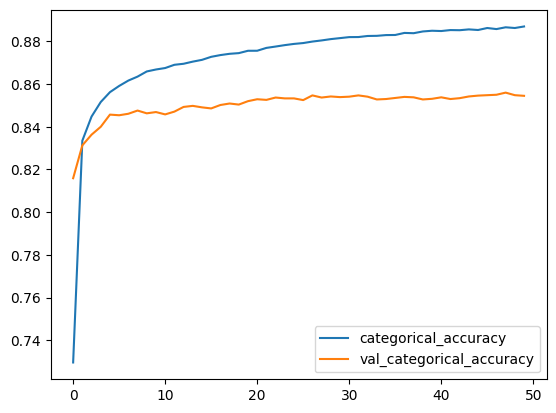

In [27]:
hist_pd[['categorical_accuracy',"val_categorical_accuracy"]].plot()

<Axes: >

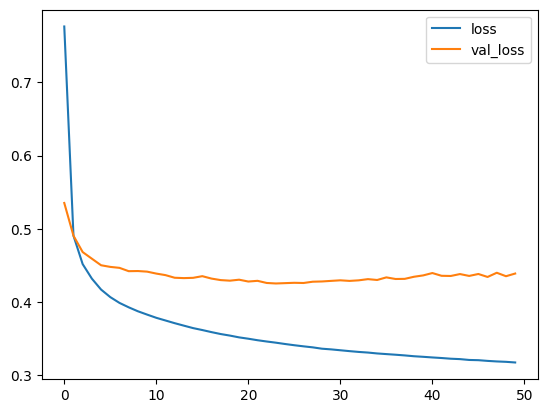

In [28]:
hist_pd[['loss',"val_loss"]].plot()

In [29]:
print(metrics.classification_report(np.argmax(test_label, axis=1), np.argmax(model.predict(test_data), axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.78      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.73      0.82      0.77      1000
           5       0.95      0.92      0.93      1000
           6       0.73      0.53      0.61      1000
           7       0.92      0.94      0.93      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#### Benchmark

| **Optimiseur**         | **Précision (%)** | **Rappel (%)** | **F1-Score (%)** | **Énergie consommée (kWh)** | **Mémoire utilisée (Mo)** | **Temps d'exécution (min)** |
|-------------------------|-------------------|----------------|------------------|-----------------------------|----------------------------|---------------------------|
| **Batch Gradient**     |         0.85          |        0.85        |         0.84         |             0.006385                |                            |            8.27               |
| **Momentum**           |         0.84          |      0.83          |         0.83         |              0.006491               |                            |            8.4               |
| **RMSProp**            |          0.85         |       0.85         |         0.85         |               0.007111             |                            |            9.18               |
| **Adam**               |          0.85         |        0.85        |        0.85          |             0.008262                |                            |              10.63             |
